In [ ]:
import sys
project_root = "./"
if project_root not in sys.path:
    sys.path.insert(0, project_root)

### MNIST Image Classification with a Dense Neural Network
---
This notebook demonstrates how to build and train a dense neural network for image classification. The model is trained on the well-known **MNIST dataset**, which consists of handwritten digits.

---

### Import Libraries
Imports the necessary libraries and modules. `numpy` for numerical operations, `tensorflow.keras.datasets` to load the MNIST dataset, and `matplotlib.pyplot` to visualize images and plots. A custom `ml` module is also imported.

In [ ]:
import numpy as np 
from ml import * 
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

### Load Data
Loads the MNIST dataset, which consists of handwritten digits. The dataset is split into a training and a test set.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
np.set_printoptions(linewidth=200)
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

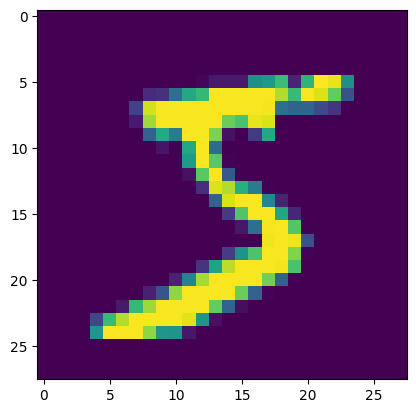

In [5]:
plt.imshow(X_train[0])
plt.show()

### Prepare and Normalize Data
Prepares the image data for training. The images are reshaped from 2D arrays (28x28 pixels) to 1D vectors (784 elements). The pixel values are also normalized from the range [0, 255] to [-1, 1] to help the network learn more effectively.

In [6]:
X_train = (X_train.reshape(X_train.shape[0], -1).astype(np.float32) - 127.5) / 127.5
X_test = (X_test.reshape(X_test.shape[0], -1).astype(np.float32) - 127.5) / 127.5


### Define the Model
Defines the architecture of the neural network. The model consists of:
* An input layer.
* Two hidden layers with 128 neurons each and ReLU activation function.
* An output layer with 10 neurons (one for each digit) and Softmax activation.

The model is configured with `CategoricalCrossentropy` as the loss function, `Adam` as the optimizer, and `AccuracyCategorical` to measure accuracy.

In [7]:
model = Model()

model.add(Dense(X_train.shape[1], 128))
model.add(ReLU())
model.add(Dense(128,128))
model.add(ReLU())
model.add(Dense(128,10))
model.add(Softmax())

model.set(loss=CategoricalCrossentropy(),
          optimizer=Adam(learning_rate=0.001, decay=1e-3),
          accuracy=AccuracyCategorical())

model.finalize()

### Train the Model
Trains the model using the training data. The training is run for 25 epochs with a batch size of 128. Validation data is used to monitor the model's performance on data it has not seen during training.

In [8]:
model.train(X_train, y_train, epochs=25, batch_size=128, print_every=100, validation_data=(X_test, y_test))

epoch: 1
step: 0, acc: 0.078 loss: 2.303 data_loss: 2.303 reg_loss: 0.000 lr: 0.001
step: 100, acc: 0.742 loss: 0.802 data_loss: 0.802 reg_loss: 0.000 lr: 0.0009090909090909091
step: 200, acc: 0.852 loss: 0.411 data_loss: 0.411 reg_loss: 0.000 lr: 0.0008333333333333334
step: 300, acc: 0.828 loss: 0.428 data_loss: 0.428 reg_loss: 0.000 lr: 0.0007692307692307692
step: 400, acc: 0.812 loss: 0.632 data_loss: 0.632 reg_loss: 0.000 lr: 0.0007142857142857143
step: 468, acc: 0.885 loss: 0.400 data_loss: 0.400 reg_loss: 0.000 lr: 0.000681198910081744
training, acc: 0.802 loss: 0.623 data_loss: 0.623 reg_loss: 0.000 lr: 0.000681198910081744
validation, acc: 0.903 loss: 0.318
epoch: 2
step: 0, acc: 0.945 loss: 0.215 data_loss: 0.215 reg_loss: 0.000 lr: 0.0006807351940095304
step: 100, acc: 0.930 loss: 0.247 data_loss: 0.247 reg_loss: 0.000 lr: 0.0006373486297004461
step: 200, acc: 0.898 loss: 0.258 data_loss: 0.258 reg_loss: 0.000 lr: 0.0005991611743559018
step: 300, acc: 0.930 loss: 0.244 data_l

### Visualize Training Progress
Plots the training and validation loss over the epochs to visualize how well the model is learning and to detect any potential overfitting.

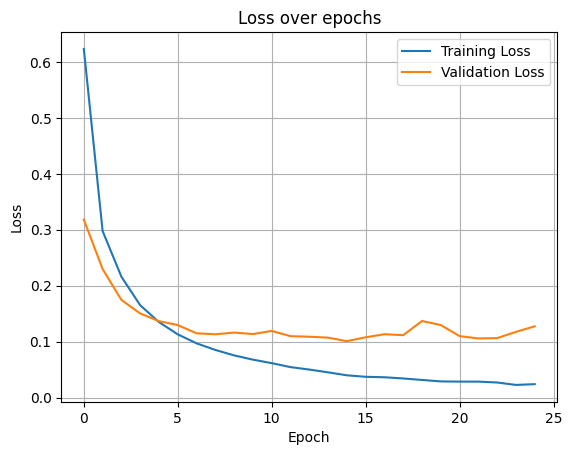

In [9]:
model.plot_loss()

### Save Model
We save the trained model to the `models` folder for later use or deployment.

In [10]:
model.save("./models/mnist_dense.model")

### Load Model
We load the previously saved model from the `models` folder for inference or further training.

In [11]:
model = Model.load("./models/mnist_dense.model")

### Make Predictions
Selects five random images from the test set and uses the trained model to predict which digit each image represents.

In [12]:
n = np.random.randint(0, len(X_test) - 5)
confidences = model.predict(X_test[n:n+5])

### Display Results
Displays the five test images along with the predicted digits and confidance from the model.

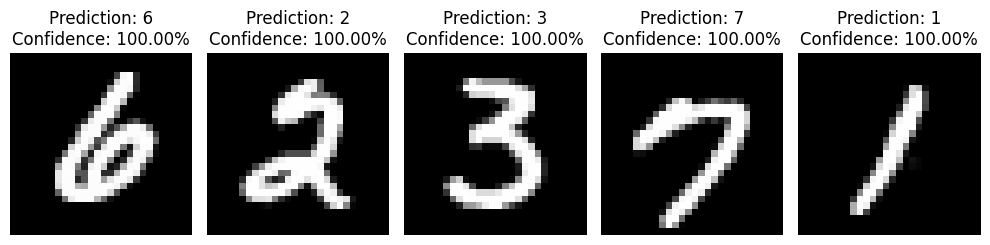

In [13]:
plt.figure(figsize=(10, 5))
for idx, i in enumerate(range(n, n+5)):
    plt.subplot(1, 5, idx+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    prediction = np.argmax(confidences[idx])
    confidence = confidences[idx][prediction]*100
    plt.title(f"Prediction: {prediction}\nConfidence: {confidence:.2f}%")
    plt.axis('off')
plt.tight_layout()
plt.show()

### MNIST Image Classification with a Convolutional Neural Network (CNN)
---
This section demonstrates how to build and train a Convolutional Neural Network (CNN) for image classification. This model is also designed to classify handwritten digits from the **MNIST dataset**, but utilizes convolutional layers to efficiently learn spatial features from the image data.

---


In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


### Prepare Data for the CNN
For the convolutional model (CNN) to work correctly, the input data needs a channel dimension. We therefore reshape the image data from (60000, 28, 28) to (60000, 28, 28, 1), where `1` represents the grayscale channel.

In [15]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train.shape

(60000, 1, 28, 28)

### Convolutional Neural Network (CNN) Model Architecture

This CNN model is designed for image classification, built with a sequential layering approach.

#### Model Layers:

The model processes input through two **convolutional blocks**, each comprising a **`Conv2D` layer** for feature extraction, followed by a **`ReLU` activation** for non-linearity, and a **`MaxPooling2d` layer** for down-sampling. Note that the **`MaxPooling2d`** implementation here isn't optimized, which can lead to longer training times.

After these blocks, a **`Flatten` layer** transforms the 2D feature maps into a 1D vector. This is then fed into two **`Dense` (fully connected) layers**. The first `Dense` layer has 128 neurons and uses `ReLU` activation. The final `Dense` layer has 10 neurons (for 10 classes) and is followed by a **`Softmax` activation** to output class probabilities.

#### Model Configuration:

The model is configured for training with:

* **Loss Function**: `CategoricalCrossentropy()`
* **Optimizer**: `Adam(learning_rate=0.0001)`
* **Accuracy Metric**: `AccuracyCategorical()`

In [16]:
model = Model()

model.add(Conv2D(in_channels=1, out_channels=8, kernel_size=3, stride=(1,1)))
model.add(ReLU())
model.add(MaxPooling2d(pool_size=(2,2), stride=(2,2)))
model.add(Conv2D(in_channels=8, out_channels=16, kernel_size=3, stride=(1,1)))
model.add(ReLU())
model.add(MaxPooling2d(pool_size=(2,2), stride=(2,2)))
model.add(Flatten())
model.add(Dense(400, 128))
model.add(ReLU())
model.add(Dense(128, 10))
model.add(Softmax())

model.set(loss=CategoricalCrossentropy(),
          optimizer=Adam(learning_rate=0.0001),
          accuracy=AccuracyCategorical())

model.finalize()

---
## Model Training Process

The model is trained for **5 epochs** using **`X_train`** and **`y_train`**, processing data in **batches of 64**. Its performance is regularly validated against **`X_test`** and **`y_test`** to monitor learning and prevent overfitting.

---

In [17]:
model.train(X_train, y_train, epochs=5, batch_size=64, print_every=100, validation_data=(X_test, y_test))

epoch: 1
step: 0, acc: 0.125 loss: 4.616 data_loss: 4.616 reg_loss: 0.000 lr: 0.0001
step: 100, acc: 0.875 loss: 0.308 data_loss: 0.308 reg_loss: 0.000 lr: 0.0001
step: 200, acc: 0.906 loss: 0.292 data_loss: 0.292 reg_loss: 0.000 lr: 0.0001
step: 300, acc: 0.906 loss: 0.255 data_loss: 0.255 reg_loss: 0.000 lr: 0.0001
step: 400, acc: 0.953 loss: 0.145 data_loss: 0.145 reg_loss: 0.000 lr: 0.0001
step: 500, acc: 0.922 loss: 0.195 data_loss: 0.195 reg_loss: 0.000 lr: 0.0001
step: 600, acc: 0.969 loss: 0.132 data_loss: 0.132 reg_loss: 0.000 lr: 0.0001
step: 700, acc: 0.906 loss: 0.356 data_loss: 0.356 reg_loss: 0.000 lr: 0.0001
step: 800, acc: 0.891 loss: 0.482 data_loss: 0.482 reg_loss: 0.000 lr: 0.0001
step: 900, acc: 0.953 loss: 0.227 data_loss: 0.227 reg_loss: 0.000 lr: 0.0001
step: 937, acc: 0.938 loss: 0.083 data_loss: 0.083 reg_loss: 0.000 lr: 0.0001
training, acc: 0.913 loss: 0.287 data_loss: 0.287 reg_loss: 0.000 lr: 0.0001
validation, acc: 0.964 loss: 0.116
epoch: 2
step: 0, acc: 

### Visualize Training Progress
Plots the training and validation loss over the epochs to visualize how well the model is learning and to detect any potential overfitting.

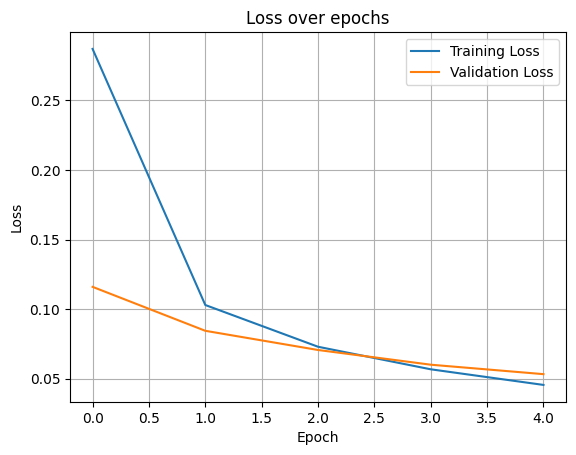

validation, acc: 0.984 loss: 0.053


In [18]:
model.plot_loss()
model.evaluate(X_test, y_test)

### Save Model
We save the trained model to the `models` folder for later use or deployment.

In [19]:
model.save("./models/mnist_cnn.model")

### Load Model
We load the previously saved model from the `models` folder for inference or further training.

In [20]:
model = Model.load("./models/mnist_cnn.model")

### Make Predictions
Selects five random images from the test set and uses the trained model to predict which digit each image represents.

In [21]:
n = np.random.randint(0, len(X_test) - 5)
confidences = model.predict(X_test[n:n+5])

### Display Results
Displays the five test images along with the predicted digits and confidance from the model.

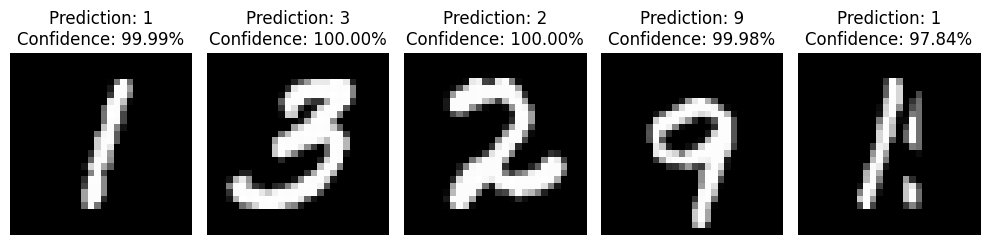

In [22]:
plt.figure(figsize=(10, 5))
for idx, i in enumerate(range(n, n+5)):
    plt.subplot(1, 5, idx+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    prediction = np.argmax(confidences[idx])
    confidence = confidences[idx][prediction]*100
    plt.title(f"Prediction: {prediction}\nConfidence: {confidence:.2f}%")
    plt.axis('off')
plt.tight_layout()
plt.show()